<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Import libraries

In [1]:
#| echo: false
#| output: asis
show_doc(run_episode)

---

### run_episode

>      run_episode (charging_type, r, ui_inputs, s_df, txt, OUTPUT_PATH,
>                   urban_area, request_id, report={}, cluster_th=0,
>                   cluster=False)

This function runs a full episode of analysis on a set of sites.

`Arguments`:

1. `charging_type`: a string indicating opportunity or destination charging
2. `r`: dictionary of global parameters read from the excel files
3. `ui_inputs`: json object of user selected inputs from the UI
4. `s_df`: pre-processed geopandas dataframe with each point stored as shapely point object
5. `txt`: a string that identifies the episode (e.g. initial, final, with_cluster etc)
6. `OUTPUT_PATH`: the directory path where the generated output files will be stored
7. `urban_area`: a string indicating the urban area being analyzed (e.g goa)
8. `request_id`: a string specific to a user session
9. `report`: a dictionary holding the progress report
10. `cluster_th`: cluster threshold value (0 to 1)
11. `cluster`: a boolean that decides if clustering will be performed. Default `False`

`Returns`: 

1. `s_u_df`  dataframe with computed utilization values for each site.
2. `report`: dictionary with interim report

In [2]:
#| echo: false
#| output: asis
show_doc(analyze_sites)

---

### analyze_sites

>      analyze_sites (request_id, urban_area:str, ui_inputs)

The function analyzes sites specified as part of a corridor.

`Arguments`:

1. `request_id`: a string that specific to a user session
1. `urban_area`: a string that identifies the urban area being analyzed (e.g. goa)
2. `ui_inputs`: json object of user selected inputs from the UI

`Returns`:

`return_analysis`: a dataframe containing the initial and clustered analysis for opportunity charging and destination charging separately.

## Example

In [ ]:
# Inputs from UI
ui_inputs = { 
    "planning_scenario": "Public places",
    "years_of_analysis": [1,2,3],
    "Ai": 50,
    "Li": 1500,
    "Bipc": 0.25,
    "Birate": 3.5,
    "Eg": 5.5,
    "backoff_factor": 1,
    "cabling_cost": 500,
    "capex_2W": 2500,
    "capex_3WS": 112000,
    "capex_4WS": 250000,
    "capex_4WF": 1500000,
    "hoarding cost": 900000,
    "kiosk_cost": 180000,
    "year1_conversion": 0.02,
    "year2_conversion": 0.05,
    "year3_conversion": 0.1,
    "holiday_percentage": 0.3,
    "fast_charging": 0.3,
    "slow_charging": 0.15,
    "cluster": False,
    "cluster_th": 0.2,
    "plot_dendrogram": False
}

s_u_df = analyze_sites('abc124','panaji', ui_inputs)

Reading input files...done.

Opportunity_charging Analysis
9

Initial Analysis
________________

Number of sites: 9/9


100%|██████████| 9/9 [00:16<00:00,  1.85s/it]


Total capex charges = INR Cr 1.93
Total opex charges = INR Cr 5.85
Total Margin = INR Cr 47162.17
confirmed sites with utilization > 20%: 2
{'no_site': '9/9', 'capex': '1.93', 'opex': '5.85', 'margin': '47162.17', 'confirmed_utilization': '20%: 2'}
confirmed sites with utilization > 20%: 2

Destination_charging Analysis
9

Initial Analysis
________________

Number of sites: 9/9


100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

Total capex charges = INR Cr 1.93
Total opex charges = INR Cr 3.12
Total Margin = INR Cr 1.12
confirmed sites with utilization > 20%: 0
{'no_site': '9/9', 'capex': '1.93', 'opex': '3.12', 'margin': '1.12', 'confirmed_utilization': '20%: 0'}
confirmed sites with utilization > 20%: 0


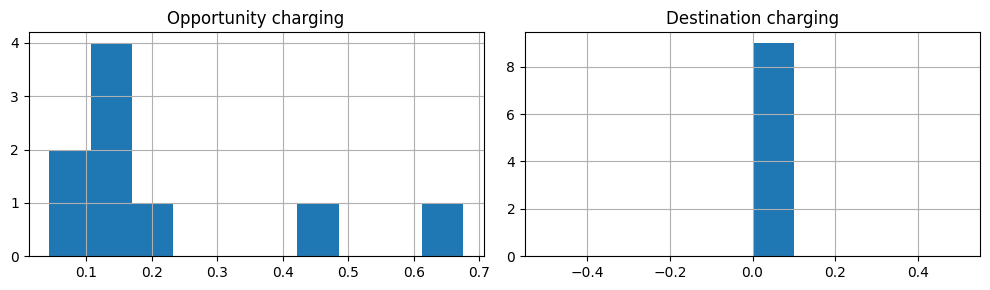

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3))
s_u_df['opportunity_charging']['initial'].hist(column='utilization',ax=ax1);
s_u_df['destination_charging']['initial'].hist(column='utilization',ax=ax2);
ax1.title.set_text('Opportunity charging')
ax2.title.set_text('Destination charging')
plt.tight_layout()

In [ ]:
#s_u_df.hist(column='unserviced')

## With Clustering

Reading input files...done.

Opportunity_charging Analysis
9

Initial Analysis
________________

Number of sites: 9/9


100%|██████████| 9/9 [00:16<00:00,  1.87s/it]


Total capex charges = INR Cr 2.07
Total opex charges = INR Cr 5.85
Total Margin = INR Cr 47162.17
confirmed sites with utilization > 20%: 2
{'no_site': '9/9', 'capex': '2.07', 'opex': '5.85', 'margin': '47162.17', 'confirmed_utilization': '20%: 2'}
candidates for clustering:  7
confirmed sites with utilization > 20%: 2
final list:  4

Cluster Analysis
________________

Number of sites: 4/9


100%|██████████| 4/4 [00:07<00:00,  1.91s/it]


Total capex charges = INR Cr 0.94
Total opex charges = INR Cr 5.52
Total Margin = INR Cr 71369.85
confirmed sites with utilization > 20%: 4
{'no_site': '4/9', 'capex': '0.94', 'opex': '5.52', 'margin': '71369.85', 'confirmed_utilization': '20%: 4'}

Destination_charging Analysis
9

Initial Analysis
________________

Number of sites: 9/9


100%|██████████| 9/9 [00:03<00:00,  2.42it/s]


Total capex charges = INR Cr 2.07
Total opex charges = INR Cr 3.12
Total Margin = INR Cr 1.12
confirmed sites with utilization > 20%: 0
{'no_site': '9/9', 'capex': '2.07', 'opex': '3.12', 'margin': '1.12', 'confirmed_utilization': '20%: 0'}
candidates for clustering:  9
confirmed sites with utilization > 20%: 0
final list:  3

Cluster Analysis
________________

Number of sites: 3/9


100%|██████████| 3/3 [00:01<00:00,  2.51it/s]


Total capex charges = INR Cr 0.71
Total opex charges = INR Cr 1.04
Total Margin = INR Cr 0.37
confirmed sites with utilization > 20%: 0
{'no_site': '3/9', 'capex': '0.71', 'opex': '1.04', 'margin': '0.37', 'confirmed_utilization': '20%: 0'}


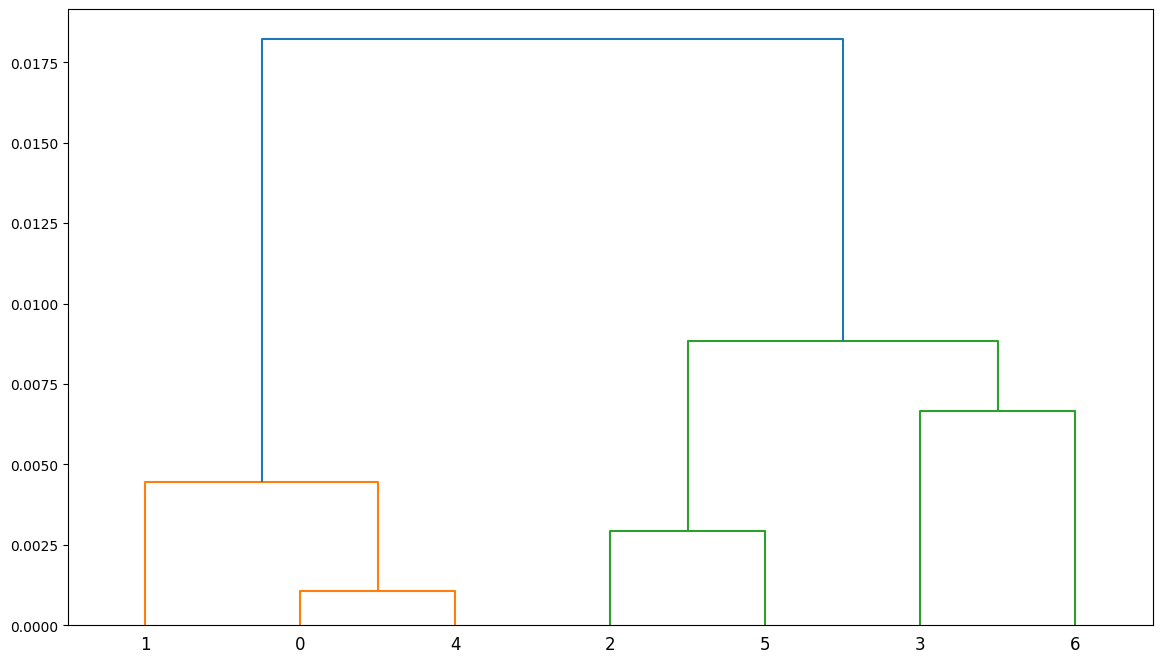

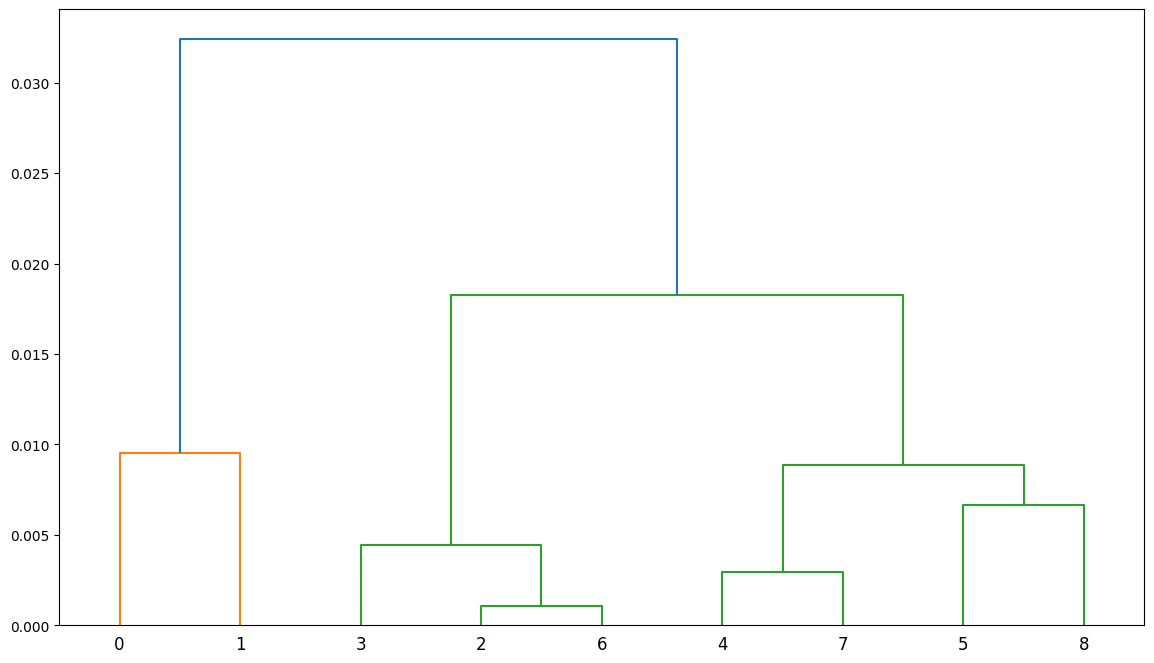

In [ ]:
# Inputs from UI
ui_inputs = { 
    "planning_scenario": "Public places",
    "years_of_analysis": [1,2,3],
    "Ai": 50,
    "Li": 1500,
    "Bipc": 0.25,
    "Birate": 3.5,
    "Eg": 5.5,
    "backoff_factor": 1,
    "cabling_cost": 500000,
    "capex_2W": 2500,
    "capex_3WS": 112000,
    "capex_4WS": 250000,
    "capex_4WF": 1500000,
    "hoarding cost": 900000,
    "kiosk_cost": 180000,
    "year1_conversion": 0.02,
    "year2_conversion": 0.05,
    "year3_conversion": 0.1,
    "holiday_percentage": 0.3,
    "fast_charging": 0.3,
    "slow_charging": 0.15,
    "cluster": True,
    "cluster_th": 0.2,
    "plot_dendrogram": True
}

s_u_df = analyze_sites('abc124','panaji', ui_inputs)

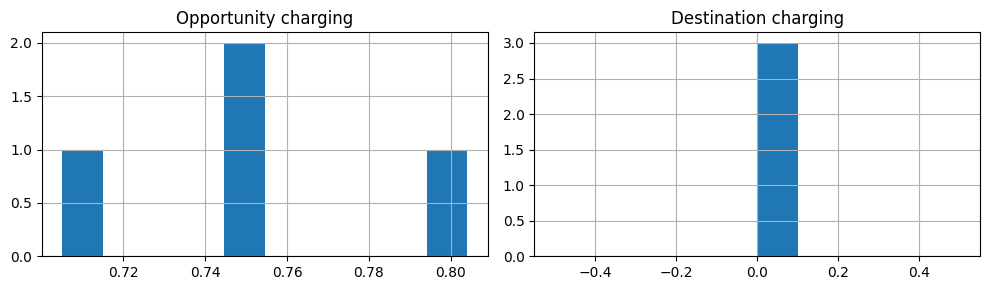

In [ ]:
# after clustering
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3))
s_u_df['opportunity_charging']['cluster'].hist(column='utilization',ax=ax1);
s_u_df['destination_charging']['cluster'].hist(column='utilization',ax=ax2);
ax1.title.set_text('Opportunity charging')
ax2.title.set_text('Destination charging')
plt.tight_layout()